In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df=pd.read_csv('../CDSAML/BBC_News_Train.csv')
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
df=df.dropna()
X=df.drop(['ArticleId','Category'],axis=1)
X

,Text
0,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...
...,...
1485,double eviction from big brother model caprice...
1486,dj double act revamp chart show dj duo jk and ...
1487,weak dollar hits reuters revenues at media gro...
1488,apple ipod family expands market apple has exp...


In [4]:
y=df['Category']
y

0            business
1            business
2            business
3                tech
4            business
            ...      
1485    entertainment
1486    entertainment
1487         business
1488             tech
1489             tech
Name: Category, Length: 1490, dtype: object

In [5]:
messages=X.copy()
messages.reset_index(inplace=True)
messages

,index,Text
0,0,worldcom ex-boss launches defence lawyers defe...
1,1,german business confidence slides german busin...
2,2,bbc poll indicates economic gloom citizens in ...
3,3,lifestyle governs mobile choice faster bett...
4,4,enron bosses in $168m payout eighteen former e...
...,...,...
1485,1485,double eviction from big brother model caprice...
1486,1486,dj double act revamp chart show dj duo jk and ...
1487,1487,weak dollar hits reuters revenues at media gro...
1488,1488,apple ipod family expands market apple has exp...


In [6]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus=[]
for i in range(0,len(messages)):
#     print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['Text'][i]) #replacing all charecters apart from A-Z,a-z with ' '
    review = review.lower()
    review = nltk.word_tokenize(review)
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
corpus

['worldcom ex bos launch defence lawyer defending former worldcom chief bernie ebbers battery fraud charge called company whistleblower first witness cynthia cooper worldcom ex head internal accounting alerted director irregular accounting practice u telecom giant warning led collapse firm following discovery bn bn accounting fraud mr ebbers pleaded guilty charge fraud conspiracy prosecution lawyer argued mr ebbers orchestrated series accounting trick worldcom ordering employee hide expense inflate revenue meet wall street earnings estimate m cooper run consulting business told jury new york wednesday external auditor arthur andersen approved worldcom accounting early said andersen given green light procedure practice used worldcom mr ebber lawyer said unaware fraud arguing auditor alert problem m cooper also said shareholder meeting mr ebbers often passed technical question company finance chief giving brief answer prosecution star witness former worldcom financial chief scott sulliva

In [7]:
from gowpy.gow.builder import GoWBuilder
builder = GoWBuilder(directed=True, window_size=4)
gow = builder.compute_gow_from_document(corpus[0])

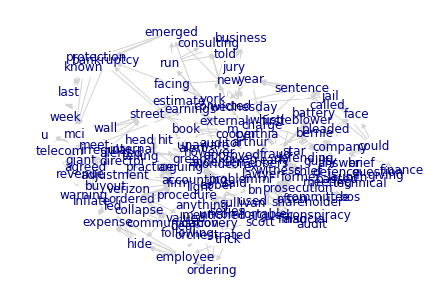

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

g = gow.to_labeled_graph()

options = {
    "font_weight" : 'normal',
    "font_color" : 'darkblue',
    #
    "edge_color" : 'lightgray',
    #
    "node_size" : 400,
    "node_color": 'white',
    "with_labels": True,
}
nx.draw(g, **options)

In [20]:
from gowpy.summarization.unsupervised import CoreRankKeywordExtractor

extractor_kw_cr = CoreRankKeywordExtractor(directed=False, weighted=True, window_size=2)
extractor_kw_cr.extract(corpus[0], n=20)

[('worldcom', 32),
 ('accounting', 26),
 ('said', 22),
 ('mr', 20),
 ('ebbers', 19),
 ('fraud', 17),
 ('cooper', 14),
 ('lawyer', 13),
 ('chief', 12),
 ('sullivan', 12),
 ('charge', 10),
 ('m', 9),
 ('andersen', 9),
 ('meeting', 9),
 ('company', 8),
 ('witness', 8),
 ('practice', 8),
 ('firm', 8),
 ('prosecution', 8),
 ('auditor', 8)]

In [23]:
from gowpy.feature_extraction.gow import TwidfVectorizer

vectorizer_gow = TwidfVectorizer(directed=True,window_size=4,min_df=0.0,max_df=1.0,term_weighting='degree')

V = vectorizer_gow.fit_transform(corpus)
V

<1490x20849 sparse matrix of type '<class 'numpy.float64'>'
	with 219011 stored elements in Compressed Sparse Row format>